In [1]:
# Data Mining for Decision Making
## Final Project - Training a Multi Layer Perceptron

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier

In [3]:
#Import the DataSet
df = pd.read_csv('covtype.csv')

#shuffle the rows
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]  

#split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
#Transforming the data
#transform the numeric values only, not the binary one
numericOld_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
binary_cols = [col for col in numericOld_cols if set(X_train[col].unique()) <= {0,1}]
numeric_cols = [col for col in numericOld_cols if col not in binary_cols]
ct = ColumnTransformer(
    [('scaler', StandardScaler(), numeric_cols)],
    remainder='passthrough'  
)

X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [10]:
param_grid1 = {
    'hidden_layer_sizes': [(50,)],
    'activation': ['relu', 'tanh']
}

In [11]:
param_grid2 = {
    'hidden_layer_sizes': [(100,50,25)],
    'activation': ['relu', 'tanh']
}

In [12]:
grid_search1 = GridSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    param_grid1,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search1.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,)]},
             scoring='accuracy', verbose=1)

In [13]:
print("\nBest Parameters:", grid_search1.best_params_)
print("Best Cross-Validation Accuracy:", grid_search1.best_score_)

best_mlp1 = grid_search1.best_estimator_
y_pred_best1 = best_mlp1.predict(X_test)

print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred_best1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best1))


Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50,)}
Best Cross-Validation Accuracy: 0.7671602774139711

Test Set Accuracy: 0.7295766890699896

Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.60      0.70     42259
           2       0.74      0.84      0.79     56913
           3       0.54      0.88      0.67      7004
           4       0.39      0.86      0.53       552
           5       0.41      0.25      0.31      1916
           6       0.44      0.29      0.35      3399
           7       0.71      0.74      0.72      4160

    accuracy                           0.73    116203
   macro avg       0.58      0.64      0.58    116203
weighted avg       0.74      0.73      0.72    116203



In [14]:
grid_search2 = GridSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    param_grid2,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search2.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(100, 50, 25)]},
             scoring='accuracy', verbose=1)

In [15]:
print("\nBest Parameters:", grid_search2.best_params_)
print("Best Cross-Validation Accuracy:", grid_search2.best_score_)

best_mlp2 = grid_search2.best_estimator_
y_pred_best2 = best_mlp2.predict(X_test)

print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred_best2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best2))


Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 50, 25)}
Best Cross-Validation Accuracy: 0.8328754247207181

Test Set Accuracy: 0.8324742046246655

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.77      0.82     42259
           2       0.83      0.90      0.86     56913
           3       0.81      0.86      0.83      7004
           4       0.70      0.78      0.74       552
           5       0.64      0.50      0.56      1916
           6       0.68      0.66      0.67      3399
           7       0.78      0.88      0.82      4160

    accuracy                           0.83    116203
   macro avg       0.76      0.76      0.76    116203
weighted avg       0.83      0.83      0.83    116203



In [16]:
param_grid3 = {
    'hidden_layer_sizes': [(100,50,50,25)],
    'activation': ['relu', 'tanh']
}

grid_search3 = GridSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    param_grid3,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search3.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(100, 50, 50, 25)]},
             scoring='accuracy', verbose=1)

In [17]:
print("\nBest Parameters:", grid_search3.best_params_)
print("Best Cross-Validation Accuracy:", grid_search3.best_score_)

best_mlp3 = grid_search3.best_estimator_
y_pred_best3 = best_mlp3.predict(X_test)

print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred_best3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best3))


Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 50, 50, 25)}
Best Cross-Validation Accuracy: 0.8500050445125588

Test Set Accuracy: 0.8433431150658761

Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.84      0.83     42259
           2       0.88      0.85      0.87     56913
           3       0.80      0.92      0.86      7004
           4       0.78      0.78      0.78       552
           5       0.75      0.49      0.59      1916
           6       0.78      0.67      0.72      3399
           7       0.73      0.92      0.81      4160

    accuracy                           0.84    116203
   macro avg       0.79      0.78      0.78    116203
weighted avg       0.84      0.84      0.84    116203



In [18]:
results_df1 = pd.DataFrame(grid_search1.cv_results_)
results_df1 = results_df1.sort_values(by='mean_test_score', ascending=False)

print("\n=== All Model Accuracies ===")
print(results_df1[['param_hidden_layer_sizes', 'param_activation', 'mean_test_score']])


=== All Model Accuracies ===
  param_hidden_layer_sizes param_activation  mean_test_score
0                    (50,)             relu         0.767160
1                    (50,)             tanh         0.698209


In [19]:
results_df2 = pd.DataFrame(grid_search2.cv_results_)
results_df2 = results_df2.sort_values(by='mean_test_score', ascending=False)
print("\n=== All Model Accuracies ===")
print(results_df2[['param_hidden_layer_sizes', 'param_activation', 'mean_test_score']])

results_df3 = pd.DataFrame(grid_search3.cv_results_)
results_df3 = results_df3.sort_values(by='mean_test_score', ascending=False)
print("\n=== All Model Accuracies ===")
print(results_df3[['param_hidden_layer_sizes', 'param_activation', 'mean_test_score']])


=== All Model Accuracies ===
  param_hidden_layer_sizes param_activation  mean_test_score
0            (100, 50, 25)             relu         0.832875
1            (100, 50, 25)             tanh         0.687889

=== All Model Accuracies ===
  param_hidden_layer_sizes param_activation  mean_test_score
0        (100, 50, 50, 25)             relu         0.850005
1        (100, 50, 50, 25)             tanh         0.710485


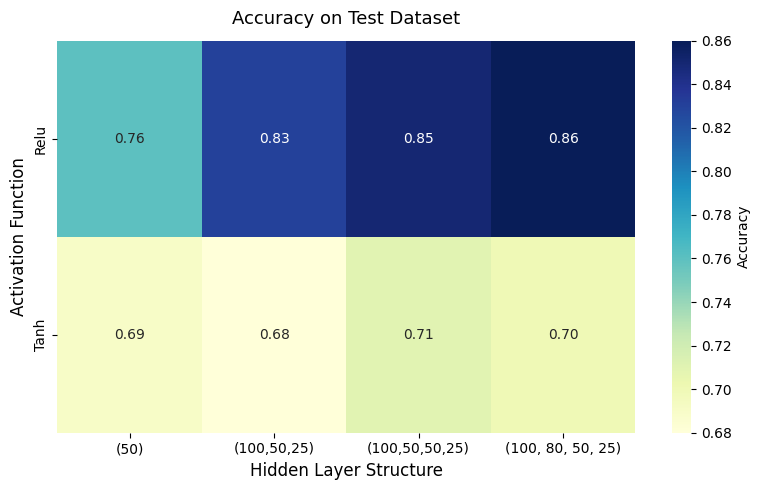

In [44]:
matrixMVA = np.array([[0.76, 0.83, 0.85, 0.86], [0.69, 0.68, 0.71, 0.70]])
# Convert to DataFrame (this helps label rows/columns)
df_heatmap = pd.DataFrame(
    matrixMVA,
    index=['Relu', 'Tanh'],                     # y-ticks (rows)
    columns=['(50)', '(100,50,25)', '(100,50,50,25)', '(100, 80, 50, 25)']    # x-ticks (columns)
)

# Create heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    df_heatmap,
    annot=True,          # show the values inside the cells
    fmt=".2f",           # show values with 2 decimal places
    cmap="YlGnBu",       # color map
    cbar_kws={'label': 'Accuracy'}  # color bar label
)

# Labels and title
plt.title("Accuracy on Test Dataset", fontsize=13, pad=12)
plt.xlabel("Hidden Layer Structure", fontsize=12)
plt.ylabel("Activation Function", fontsize=12)

plt.tight_layout()
plt.show()

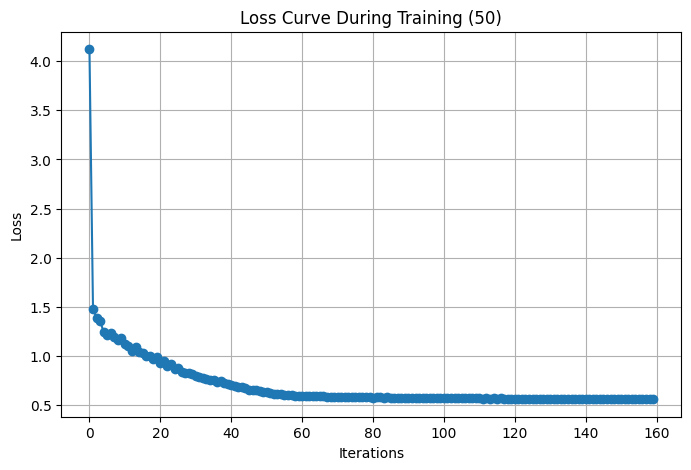

In [36]:
plt.figure(figsize=(8,5))
plt.plot(best_mlp1.loss_curve_, marker='o')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve During Training (50)")
plt.grid(True)
plt.show()

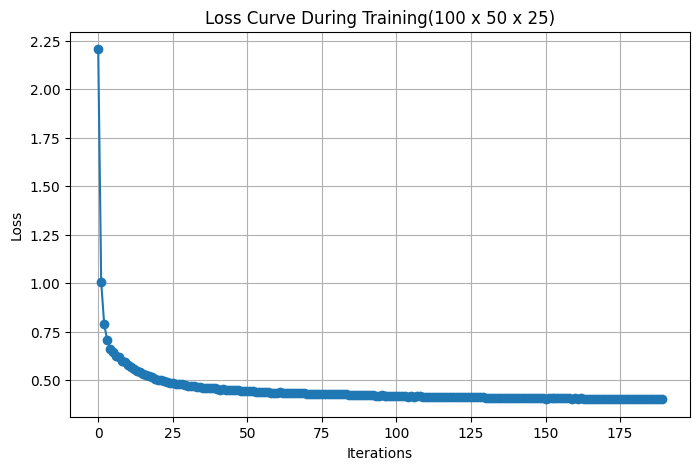

In [37]:
plt.figure(figsize=(8,5))
plt.plot(best_mlp2.loss_curve_, marker='o')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve During Training(100 x 50 x 25)")
plt.grid(True)
plt.show()

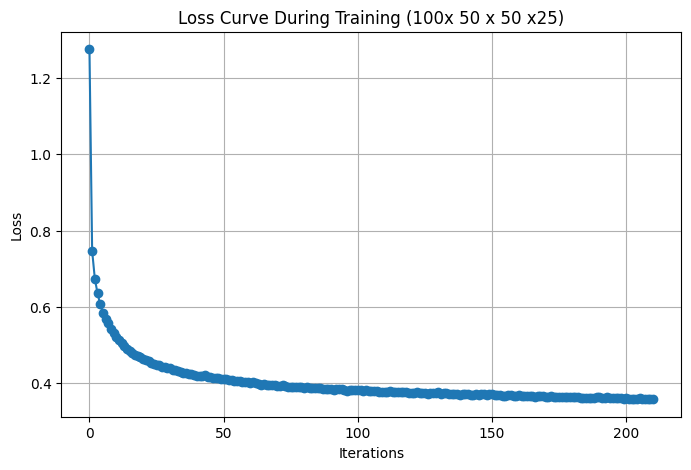

In [38]:
plt.figure(figsize=(8,5))
plt.plot(best_mlp3.loss_curve_, marker='o')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve During Training (100x 50 x 50 x25)")
plt.grid(True)
plt.show()

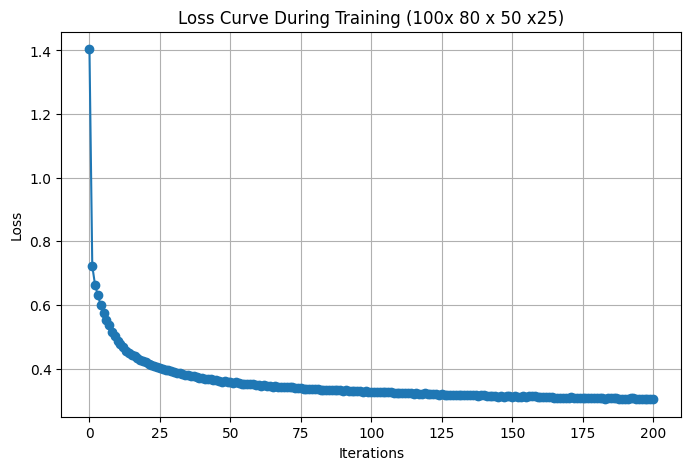

In [46]:
plt.figure(figsize=(8,5))
plt.plot(best_mlp4.loss_curve_, marker='o')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve During Training (100x 80 x 50 x25)")
plt.grid(True)
plt.show()

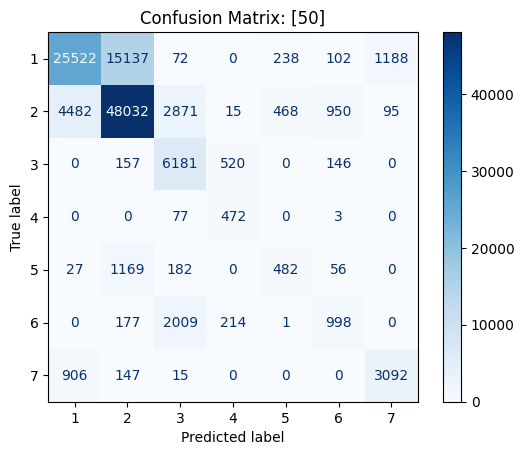

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [1,2,3,4,5,6,7])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: [50]")
plt.show()

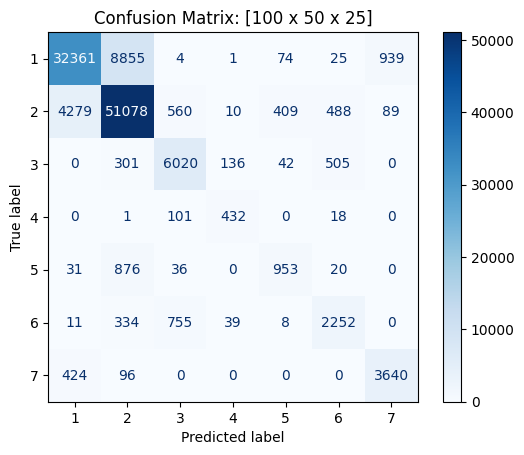

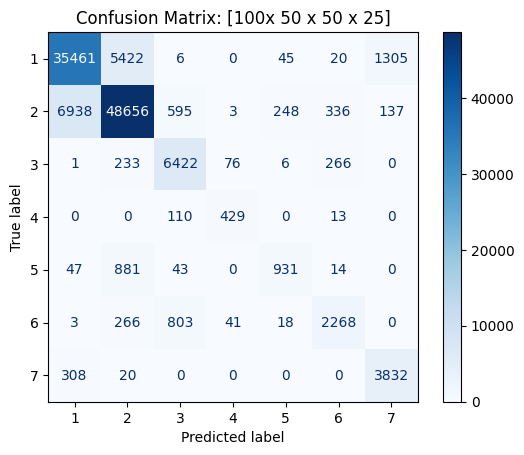

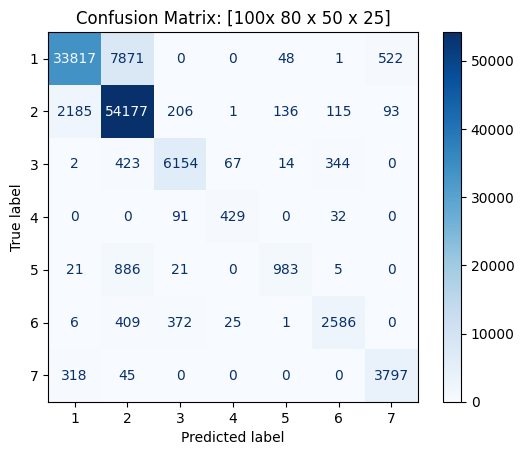

In [47]:
cm2 = confusion_matrix(y_test, y_pred_best2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels = [1,2,3,4,5,6,7])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: [100 x 50 x 25]")
plt.show()

cm3 = confusion_matrix(y_test, y_pred_best3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels = [1,2,3,4,5,6,7])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: [100x 50 x 50 x 25]")
plt.show()

cm4 = confusion_matrix(y_test, y_pred_best4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels = [1,2,3,4,5,6,7])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: [100x 80 x 50 x 25]")
plt.show()

In [41]:
param_grid4 = {
    'hidden_layer_sizes': [(100,80,50,25)],
    'activation': ['relu', 'tanh']
}

grid_search4 = GridSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    param_grid4,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search4.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(100, 80, 50, 25)]},
             scoring='accuracy', verbose=1)

In [42]:
print("\nBest Parameters:", grid_search4.best_params_)
print("Best Cross-Validation Accuracy:", grid_search4.best_score_)

best_mlp4 = grid_search4.best_estimator_
y_pred_best4 = best_mlp4.predict(X_test)

print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred_best4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best4))


Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 80, 50, 25)}
Best Cross-Validation Accuracy: 0.8651747432300766

Test Set Accuracy: 0.8772837190089757

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.80      0.86     42259
           2       0.85      0.95      0.90     56913
           3       0.90      0.88      0.89      7004
           4       0.82      0.78      0.80       552
           5       0.83      0.51      0.63      1916
           6       0.84      0.76      0.80      3399
           7       0.86      0.91      0.89      4160

    accuracy                           0.88    116203
   macro avg       0.86      0.80      0.82    116203
weighted avg       0.88      0.88      0.88    116203



In [43]:
results_df4 = pd.DataFrame(grid_search4.cv_results_)
results_df4 = results_df4.sort_values(by='mean_test_score', ascending=False)
print("\n=== All Model Accuracies ===")
print(results_df4[['param_hidden_layer_sizes', 'param_activation', 'mean_test_score']])


=== All Model Accuracies ===
  param_hidden_layer_sizes param_activation  mean_test_score
0        (100, 80, 50, 25)             relu         0.865175
1        (100, 80, 50, 25)             tanh         0.706886
